In [17]:
import importlib
import infer_and_plot
importlib.reload(infer_and_plot)
from infer_and_plot import *

In [30]:
path = '/Users/macbook/Desktop/WasteScan/waste-scan/visual-waste/tests/units/test_img.jpeg'
url = 'http://18.204.8.241:8000/upload/'
dicti = upload_image(path,url,return_json=True)

Status Code: 200
Response: {"predictions":{"predictions":[{"box":[221.5,217.0,201.0,196.0],"confidence":0.5243715047836304,"class":8},{"box":[222.0,399.5,218.0,205.0],"confidence":0.4157872498035431,"class":8}]}}


In [32]:
from bbox_visual_PIL import get_bbox_cat_from_res
print(get_bbox_cat_from_res(dicti))

([[221.5, 217.0, 201.0, 196.0], [222.0, 399.5, 218.0, 205.0]], [8, 8])


In [1]:
from infer_and_plot import *
from bbox_visual_PIL import visualize_image_with_annotations
from prediction_record import *

import importlib
import prediction_record
import infer_and_plot
importlib.reload(prediction_record)
importlib.reload(infer_and_plot)    


<module 'infer_and_plot' from '/Users/macbook/Desktop/WasteScan/waste-scan/visual-waste/infer_and_plot/infer_and_plot.py'>

In [4]:
model_info = {
    "yolo-siom-v1": "http://18.204.8.241:8000/upload/"
}

# Parameters
model_name = "yolo-siom-v1"
image_path = "/Users/macbook/Desktop/Trashback/1689690390941-user.jpg"
user_id = "user123"

# Run main function
main(model_name, image_path, user_id)

Status Code: 200
Response: {"predictions":{"predictions":[{"box":[358.0,349.5,244.0,131.0],"confidence":0.5371050834655762,"class":7}]}}
PredictionRecord(image_name=1689690390941-user.jpg, prediction={'predictions': {'predictions': [{'box': [358.0, 349.5, 244.0, 131.0], 'confidence': 0.5371050834655762, 'class': 7}]}}, model_name=yolo-siom-v1, date=2024-06-17 15:56:29.650945, user_id=user123)


In [6]:
model_server = ModelServer(model_name)

#prediction_record = model_server.get_prediction(image_path, user_id)

In [60]:
prediction = prediction_record.prediction

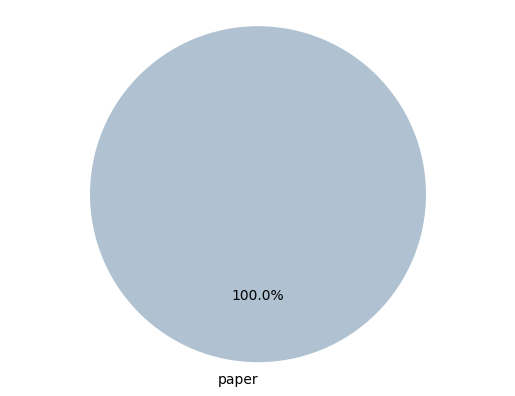

In [61]:
plot_pie_chart(get_class_proportion(prediction))

Status Code: 200
Response: {"predictions":{"predictions":[{"box":[177.0,380.0,122.0,100.0],"confidence":0.8177598714828491,"class":3},{"box":[486.5,286.0,95.0,94.0],"confidence":0.7156623005867004,"class":3},{"box":[350.5,389.0,115.0,98.0],"confidence":0.7147246599197388,"class":3},{"box":[410.5,366.0,111.0,98.0],"confidence":0.7114076614379883,"class":3},{"box":[329.0,296.0,130.0,74.0],"confidence":0.661669909954071,"class":3},{"box":[263.5,246.5,141.0,69.0],"confidence":0.6491090059280396,"class":3},{"box":[156.0,309.0,92.0,86.0],"confidence":0.6219989657402039,"class":3},{"box":[269.5,388.0,127.0,96.0],"confidence":0.5930314660072327,"class":3},{"box":[485.5,285.0,97.0,90.0],"confidence":0.5302149057388306,"class":5},{"box":[176.0,379.5,122.0,101.0],"confidence":0.43309277296066284,"class":5},{"box":[229.0,325.0,62.0,48.0],"confidence":0.3807557225227356,"class":3},{"box":[349.0,389.0,116.0,100.0],"confidence":0.3757615089416504,"class":5},{"box":[269.0,388.0,128.0,98.0],"confidence

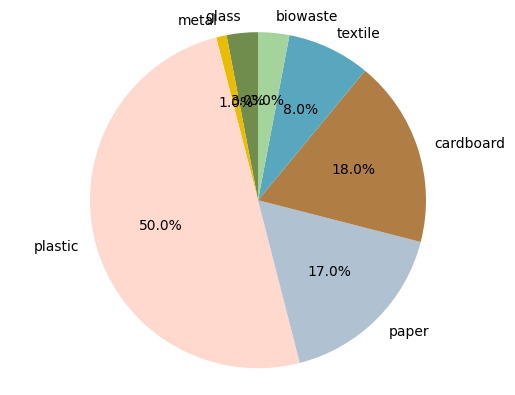

In [23]:
import os

list_of_images = os.listdir('/Users/macbook/Desktop/PHOTOS/VILLIERS')[:30]
folder_path = '/Users/macbook/Desktop/PHOTOS/VILLIERS/'
records = []

for image in list_of_images:
    image_path = folder_path + image
    prediction_record = model_server.get_prediction(image_path, user_id)
    records.append(prediction_record)

prediction_list = prediction_list_from_records(records)

plot_pie_chart(get_global_composition(prediction_list))

In [31]:
save_predictions_to_file(prediction_list,'results_villiers')

number of images: 30


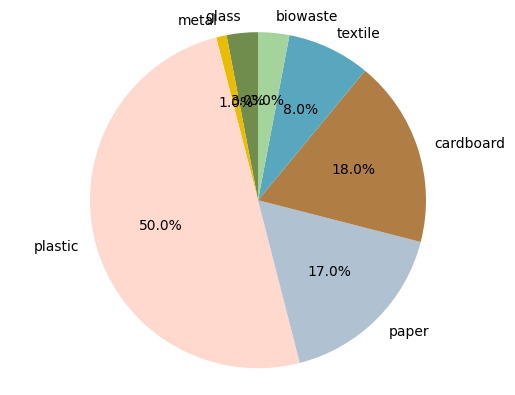

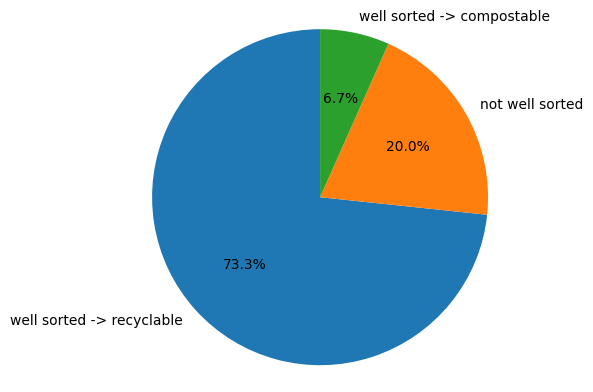

The waste is worth 0.109 euros per kg
This correspond to 27.7 euros per year if you recycle 250 kg of waste per year
The waste represents 2.034 kgCO2eq per kg of excess if not recycled
This correspond to 516.6 kgCO2eq per year if you recycle 250 kg of waste per year


In [32]:
plot_summary(prediction_list)